# Problem Statement
To predict the sales based on the MRP

In [1]:
#preprocessing libraries
import numpy as np
import pandas as pd

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#modelling and metrics libraries
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv('train_v9rqX0R.csv')

In [5]:
data.shape

(8523, 12)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [22]:
data.index

RangeIndex(start=0, stop=8523, step=1)

In [7]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [8]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [9]:
data.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

<AxesSubplot:>

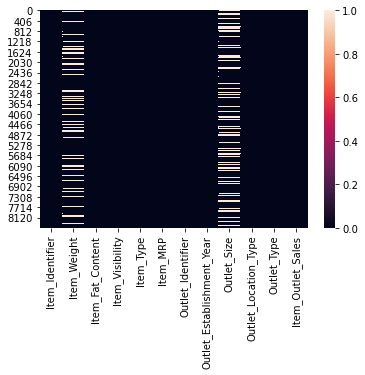

In [11]:
sns.heatmap(data.isna())

In [16]:
data.duplicated().value_counts()

False    8523
dtype: int64

In [17]:
data[data.duplicated()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [27]:
data.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [26]:
[print(data[i].value_counts(),"\n") for i in data.columns if data[i].nunique()<20]

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64 

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64 

OUT027    935
OUT013    932
OUT035    930
OUT046    930
OUT049    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64 

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64 

Medium    2793
Small    

[None, None, None, None, None, None, None]

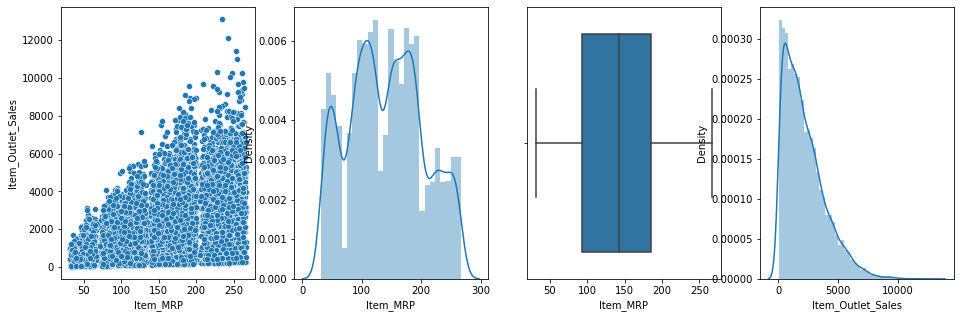

In [72]:
%matplotlib inline
plt.figure(figsize=(16,5))
plt.subplot(1,4,1)
sns.scatterplot(x=data['Item_MRP'],y=data['Item_Outlet_Sales'])
plt.subplot(1,4,2)
sns.distplot(data['Item_MRP'])
plt.subplot(1,4,3)
sns.boxplot(data['Item_MRP'])
plt.subplot(1,4,4)
sns.distplot(data['Item_Outlet_Sales'])
plt.show()

In [140]:
#Script to find the outliers
def find_outlier(cols=data.select_dtypes(include=np.number).columns[:-1]):
    for col_name in cols:
        if  data[col_name].nunique()>2:
            print("*"*10)
            print(col_name)
            q1 = data[col_name].quantile(0.25)
            q3 = data[col_name].quantile(0.75)
            iqr = q3 - q1

            low = q1-1.5*iqr
            high = q3+1.5*iqr
            out = data.loc[(data[col_name] < low) | (data[col_name] > high), col_name]
            cnt_out = out.count()
            tot_obs = data.shape[0]
            per = round((cnt_out/tot_obs)*100,2)
            print("Outliers = ",cnt_out,"out of",tot_obs,"observations ->",per,"%\n",out)

In [95]:
def print_rpt(y_act,y_pred,lbl=""):
    print('*'*20)
    print(lbl,"RMSE:",mean_squared_error(y_act,y_pred))
    print(lbl,"MAE :",mean_absolute_error(y_act,y_pred))
    print(lbl,"MAPE:",(np.mean(abs(np.array(y_act)-np.array(y_pred))/np.array(y_act)))*100)
    print(lbl,"R2  :",r2_score(y_act,y_pred))
    print('-'*20)

In [119]:
def predict_compute(X,y):
    display(X.head(),y.head())
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=8)
    print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
    
    model = LinearRegression()
    model.fit(X_train,y_train)
    print('Slope:',model.coef_,"\nIntercept",model.intercept_)
    
    y_train_pred = model.predict(X_train)
    print_rpt(y_train,y_train_pred,'Train')

    y_test_pred = model.predict(X_test)
    print_rpt(y_test,y_test_pred,'Test ')

In [94]:
#find_outlier(data[['Item_MRP','Item_Visibility']].columns)
display(data.nunique())
find_outlier()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

**********
Item_Weight
Outliers =  0 out of 8523 observations -> 0.0 %
 Series([], Name: Item_Weight, dtype: float64)
**********
Item_Visibility
Outliers =  144 out of 8523 observations -> 1.69 %
 49      0.255395
83      0.293418
108     0.278974
174     0.291865
334     0.204700
          ...   
8292    0.209163
8345    0.266397
8371    0.214125
8432    0.227261
8509    0.214306
Name: Item_Visibility, Length: 144, dtype: float64
**********
Item_MRP
Outliers =  0 out of 8523 observations -> 0.0 %
 Series([], Name: Item_MRP, dtype: float64)
**********
Outlet_Establishment_Year
Outliers =  0 out of 8523 observations -> 0.0 %
 Series([], Name: Outlet_Establishment_Year, dtype: int64)


###### Model predicting sales based on MRP

In [120]:
X = data[['Item_MRP']]
y = data[['Item_Outlet_Sales']]
predict_compute(X,y)

,Item_MRP
0,249.8092
1,48.2692
2,141.6180
3,182.0950
4,53.8614


,Item_Outlet_Sales
0,3735.1380
1,443.4228
2,2097.2700
3,732.3800
4,994.7052


(6818, 1) (1705, 1) (6818, 1) (1705, 1)
Slope: [[15.33598685]] 
Intercept [12.71966141]
********************
Train RMSE: 1934180.1382504066
Train MAE : 1022.5889048471007
Train MAPE: 141.98083779341079
Train R2  : 0.32114747396139776
--------------------
********************
Test  RMSE: 2133295.1094890516
Test  MAE : 1069.1989501954438
Test  MAPE: 152.48992753180937
Test  R2  : 0.32504695688955476
--------------------


In [104]:
data[['Item_MRP']].describe().T

,count,mean,std,min,25%,50%,75%,max
Item_MRP,8523.0,140.992782,62.275067,31.29,93.8265,143.0128,185.6437,266.8884


In [121]:
mrp_bins = [0, 50, 100, 150, 200, 250, np.inf]
mrp_names = ['<50', '50-100', '100-150', '150-200', '200-250', '250+']

bin_data = data[['Item_MRP']].copy()
bin_data['MRP_'] = pd.cut(bin_data['Item_MRP'], mrp_bins, labels=mrp_names)
all_encoded_bin_data = pd.get_dummies(bin_data,columns=['MRP_'])

X = all_encoded_bin_data.drop(columns='Item_MRP')
y = data[['Item_Outlet_Sales']]
predict_compute(X,y)

,MRP__<50,MRP__50-100,MRP__100-150,MRP__150-200,MRP__200-250,MRP__250+
0,0,0,0,0,1,0
1,1,0,0,0,0,0
2,0,0,1,0,0,0
3,0,0,0,1,0,0
4,0,1,0,0,0,0


,Item_Outlet_Sales
0,3735.1380
1,443.4228
2,2097.2700
3,732.3800
4,994.7052


(6818, 6) (1705, 6) (6818, 1) (1705, 1)
Slope: [[9.75989217e+15 9.75989217e+15 9.75989217e+15 9.75989217e+15
  9.75989217e+15 9.75989217e+15]] 
Intercept [-9.75989217e+15]
********************
Train RMSE: 1978054.519758822
Train MAE : 1040.9910388970372
Train MAPE: 145.6344140102376
Train R2  : 0.3057485800702058
--------------------
********************
Test  RMSE: 2184579.654274929
Test  MAE : 1086.4149280938416
Test  MAPE: 155.3952339142066
Test  R2  : 0.30882104449056547
--------------------


###### Model predicting sales based on all features

In [98]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [99]:
data.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


<AxesSubplot:>

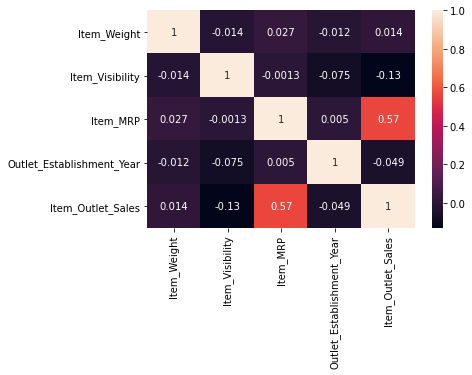

In [101]:
sns.heatmap(data.corr(),annot=True)

In [122]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,7060.0,12.857645,4.643456,4.555,8.773750,12.600000,16.850000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


In [126]:
data.describe(exclude=data.dtypes[data.dtypes!=np.object]).T

,count,unique,top,freq
Item_Identifier,8523,1559,FDG33,10
Item_Fat_Content,8523,5,Low Fat,5089
Item_Type,8523,16,Fruits and Vegetables,1232
Outlet_Identifier,8523,10,OUT027,935
Outlet_Size,6113,3,Medium,2793
Outlet_Location_Type,8523,3,Tier 3,3350
Outlet_Type,8523,4,Supermarket Type1,5577
